# Modelo
-----
## Modelo clasificador basado en técnicas lineales & árboles de decisión. 
Utilizaremos este modelo como base de comparación con modelos posteriores más complejos. 

Nos servirá este modelo también para detectar las variables más significativas para la detección de fraudes.

La entrada de este modelo será el dataset 'prepared' con los datos ya preparados para su consumición.

In [290]:
!pip install imblearn

In [291]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [292]:
df = pd.read_csv("../prep/prepared.csv")
df = df.drop(columns=['Unnamed: 0'])
df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,diffOrigen,diffDestino,cambioOrigen,cambioDestino
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,0,0,1,0,-9839.64,0.00,-0.057496,0.000010
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,0,0,1,0,-1864.28,0.00,-0.083791,0.000010
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0,0,0,0,1,-181.00,0.00,-0.153251,0.000010
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,0,1,0,0,0,-181.00,-21182.00,-0.153251,-0.954918
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,0,0,1,0,-11668.14,0.00,-0.274196,0.000010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,0,1,0,0,0,-339682.13,339682.13,-0.997065,339.682140
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,0,0,0,0,1,-6311409.28,0.00,-0.999842,0.000010
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,0,1,0,0,0,-6311409.28,6311409.27,-0.999842,90.826229
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,0,0,0,0,1,-850002.52,0.00,-0.998825,0.000010


# Modelo 1

In [293]:
train, test = train_test_split(df)
X_train = train.drop(columns=['isFraud','nameDest','nameOrig'])
y_train = train['isFraud']
X_test = test.drop(columns=['isFraud','nameDest','nameOrig'])
y_test = test['isFraud']
X_train

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (4771965, 16)
Number transactions y_train dataset:  (4771965,)
Number transactions X_test dataset:  (1590655, 16)
Number transactions y_test dataset:  (1590655,)


In [294]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 6169
Before OverSampling, counts of label '0': 4765796 

After OverSampling, the shape of train_X: (9531592, 16)
After OverSampling, the shape of train_y: (9531592,) 

After OverSampling, counts of label '1': 4765796
After OverSampling, counts of label '0': 4765796


In [295]:
lr1 = LogisticRegression(fit_intercept=True, penalty='l2', tol=1e-5, C=20, solver='lbfgs', max_iter=120,
                       warm_start=True)
lr_default = LogisticRegression()


In [296]:

lr1.fit(X_train_res, y_train_res)
preds_train = lr1.predict(X_train)
preds_test = lr1.predict(X_test)
print('accuracy in train:', accuracy_score(preds_train, y_train))
print('accuracy in test:', accuracy_score(preds_test, y_test))

accuracy in train: 0.9166831693023734
accuracy in test: 0.9168185433044878


Text(0.5, 1.0, 'Train M1 - Accuracy Score: 0.9166831693023734')

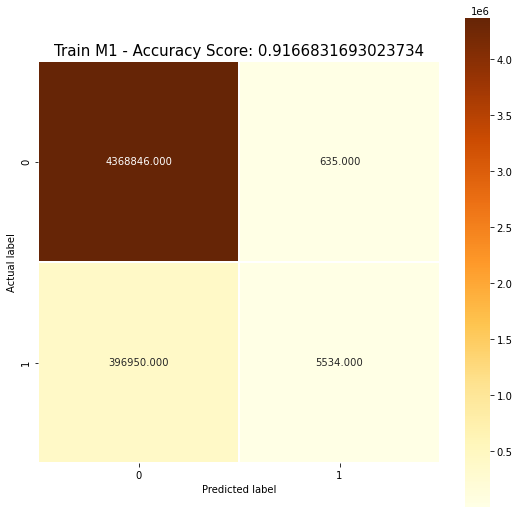

In [297]:
cmtrain1 = metrics.confusion_matrix(preds_train, y_train)
plt.figure(figsize=(9,9))
sns.heatmap(cmtrain1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'YlOrBr')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Train M1 - Accuracy Score: {0}'.format(accuracy_score(preds_train, y_train))
plt.title(all_sample_title, size = 15)

Text(0.5, 1.0, 'Test M1 - Accuracy Score: 0.9168185433044878')

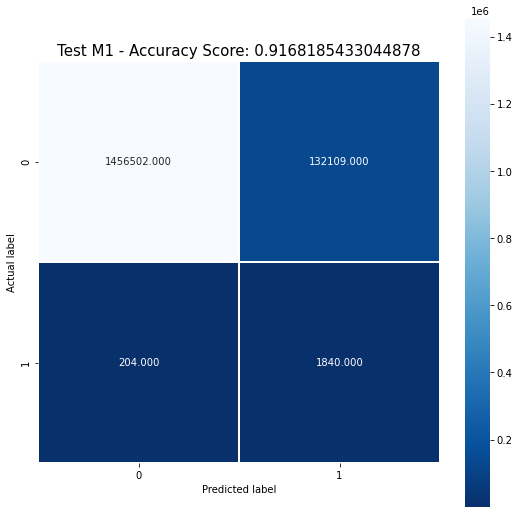

In [298]:
cmtest1 = metrics.confusion_matrix(y_test, preds_test)
plt.figure(figsize=(9,9))
sns.heatmap(cmtest1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Test M1 - Accuracy Score: {0}'.format(accuracy_score(preds_test, y_test))
plt.title(all_sample_title, size = 15)

# Modelo 2

In [322]:
train, test = train_test_split(df[df.CASH_OUT==1])
X_train = train.drop(columns=['isFraud','nameDest','nameOrig'])
y_train = train['isFraud']
X_test = test.drop(columns=['isFraud','nameDest','nameOrig'])
y_test = test['isFraud']
X_train

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,diffOrigen,diffDestino,cambioOrigen,cambioDestino
2666498,210,286811.34,9124.00,0.00,0.00,286811.34,0,0,1,0,0,0,-9124.00,286811.34,-0.901224,286.811350
610731,34,134347.93,0.00,0.00,2180146.29,2314494.21,0,0,1,0,0,0,0.00,134347.92,0.000010,0.061595
5979836,408,555966.50,51697.43,0.00,1360181.14,1916147.64,0,0,1,0,0,0,-51697.43,555966.50,-0.981024,0.408444
472194,19,135574.04,167437.00,31862.96,22308477.38,22479202.61,0,0,1,0,0,0,-135574.04,170725.23,-0.804895,0.007653
1636916,157,187440.96,0.00,0.00,242136.73,429577.69,0,0,1,0,0,0,0.00,187440.96,0.000010,0.770928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4611919,329,164052.05,0.00,0.00,1211782.56,1375834.61,0,0,1,0,0,0,0.00,164052.05,0.000010,0.135269
5489844,380,175778.51,563813.00,388034.49,0.00,175778.51,0,0,1,0,0,0,-175778.51,175778.51,-0.311215,175.778520
843899,41,71395.90,30814.00,0.00,532447.28,603843.18,0,0,1,0,0,0,-30814.00,71395.90,-0.968567,0.133839
5258622,372,40433.42,0.00,0.00,89925.04,130358.46,0,0,1,0,0,0,0.00,40433.42,0.000010,0.444690


In [323]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 3091
Before OverSampling, counts of label '0': 1675034 

After OverSampling, the shape of train_X: (3350068, 16)
After OverSampling, the shape of train_y: (3350068,) 

After OverSampling, counts of label '1': 1675034
After OverSampling, counts of label '0': 1675034


In [301]:
lr2 = LogisticRegression(fit_intercept=True, penalty='l2', tol=1e-5, C=20, solver='lbfgs', max_iter=120,
                       warm_start=True)
lr_default = LogisticRegression()


In [324]:

lr2.fit(X_train_res, y_train_res)
preds_train = lr2.predict(X_train)
preds_test = lr2.predict(X_test)
print('accuracy in train:', accuracy_score(preds_train, y_train))
print('accuracy in test:', accuracy_score(preds_test, y_test))

accuracy in train: 0.9534456610800744
accuracy in test: 0.9533175418994413


Text(0.5, 1.0, 'Train M2 - Accuracy Score: 0.9534456610800744')

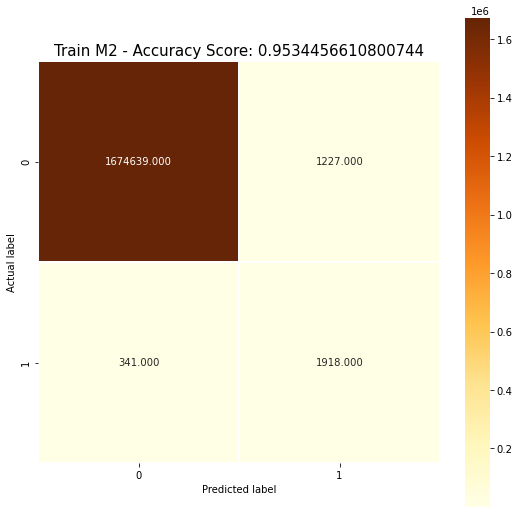

In [325]:
cmtrain2 = metrics.confusion_matrix(preds_train, y_train)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'YlOrBr')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Train M2 - Accuracy Score: {0}'.format(accuracy_score(preds_train, y_train))
plt.title(all_sample_title, size = 15)

Text(0.5, 1.0, 'Test M2 - Accuracy Score: 0.9533175418994413')

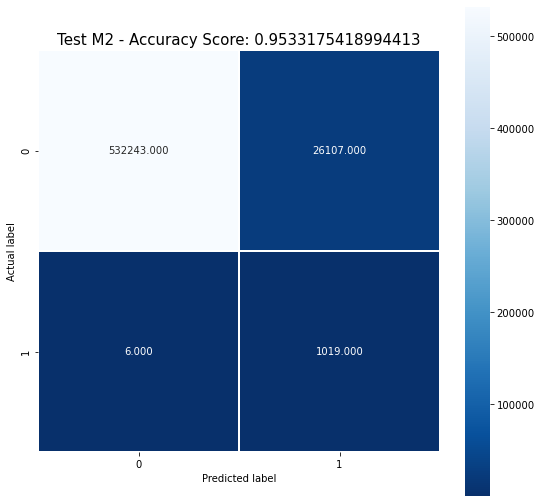

In [326]:
cmtest2 = metrics.confusion_matrix(y_test, preds_test)
plt.figure(figsize=(9,9))
sns.heatmap(cmtest2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Test M2 - Accuracy Score: {0}'.format(accuracy_score(preds_test, y_test))
plt.title(all_sample_title, size = 15)

# Modelo 3

In [305]:
train, test = train_test_split(df[df.TRANSFER==1])
X_train = train.drop(columns=['isFraud','nameDest','nameOrig'])
y_train = train['isFraud']
X_test = test.drop(columns=['isFraud','nameDest','nameOrig'])
y_test = test['isFraud']
X_train

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,diffOrigen,diffDestino,cambioOrigen,cambioDestino
1116089,130,125375.05,105706.0,0.0,1613875.77,1739250.82,0,0,0,0,0,1,-105706.0,125375.05,-0.990628,0.077638
905925,43,936634.70,0.0,0.0,1213441.24,2150075.94,0,0,0,0,0,1,0.0,936634.70,0.000010,0.771247
2855496,227,883687.53,0.0,0.0,1307195.33,2190882.86,0,0,0,0,0,1,0.0,883687.53,0.000010,0.675501
2429146,202,318471.60,0.0,0.0,1347329.04,1665800.65,0,0,0,0,0,1,0.0,318471.61,0.000010,0.236197
201643,13,814319.65,0.0,0.0,70682.41,885002.06,0,0,0,0,0,1,0.0,814319.65,0.000010,11.360104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6146385,546,651964.30,0.0,0.0,6588827.27,7240791.57,0,0,0,0,0,1,0.0,651964.30,0.000010,0.098935
4355840,309,581133.67,1487.0,0.0,346955.65,928089.32,0,0,0,0,0,1,-1487.0,581133.67,-0.597905,1.670137
3974707,297,1017297.45,0.0,0.0,1502354.13,2519651.57,0,0,0,0,0,1,0.0,1017297.44,0.000010,0.676685
305767,16,573056.67,0.0,0.0,2179376.89,2752433.56,0,0,0,0,0,1,0.0,573056.67,0.000010,0.262825


In [306]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 3070
Before OverSampling, counts of label '0': 396611 

After OverSampling, the shape of train_X: (793222, 16)
After OverSampling, the shape of train_y: (793222,) 

After OverSampling, counts of label '1': 396611
After OverSampling, counts of label '0': 396611


In [307]:
lr3 = LogisticRegression(fit_intercept=True, penalty='l2', tol=1e-5, C=20, solver='lbfgs', max_iter=120,
                       warm_start=True)
lr_default = LogisticRegression()


In [308]:

lr3.fit(X_train_res, y_train_res)
preds_train = lr3.predict(X_train)
preds_test = lr3.predict(X_test)
print('accuracy in train:', accuracy_score(preds_train, y_train))
print('accuracy in test:', accuracy_score(preds_test, y_test))

accuracy in train: 0.9784002742186894
accuracy in test: 0.9781202149698262


Text(0.5, 1.0, 'Train M3 - Accuracy Score: 0.9784002742186894')

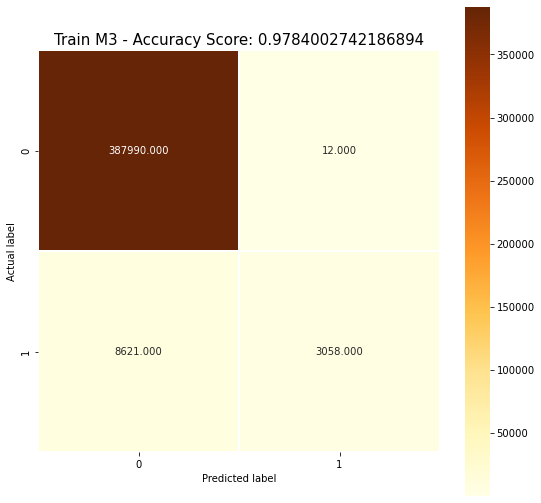

In [309]:
cmtrain3 = metrics.confusion_matrix(preds_train, y_train)
plt.figure(figsize=(9,9))
sns.heatmap(cmtrain3, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'YlOrBr')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Train M3 - Accuracy Score: {0}'.format(accuracy_score(preds_train, y_train))
plt.title(all_sample_title, size = 15)

Text(0.5, 1.0, 'Test M3 - Accuracy Score: 0.9781202149698262')

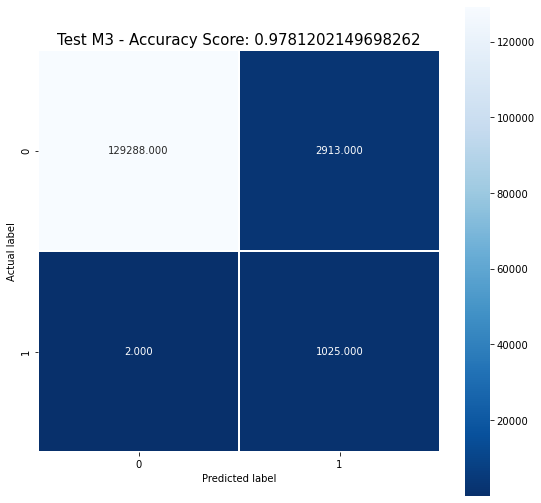

In [310]:
cmtest3 = metrics.confusion_matrix(y_test, preds_test)
plt.figure(figsize=(9,9))
sns.heatmap(cmtest3, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Test M3 - Accuracy Score: {0}'.format(accuracy_score(preds_test, y_test))
plt.title(all_sample_title, size = 15)

# Modelo 2 + 3

Text(0.5, 1.0, 'CM Modelos 2 y 3')

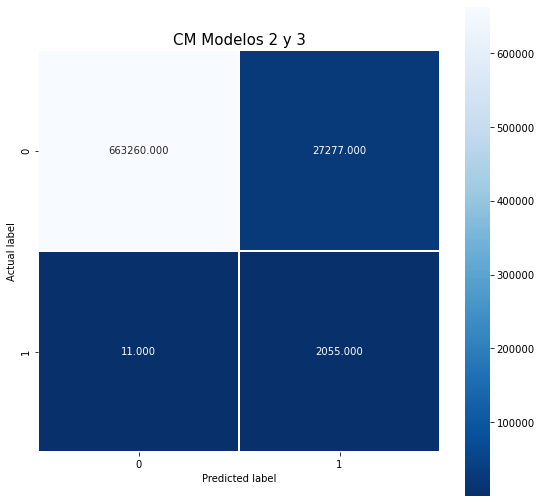

In [311]:
plt.figure(figsize=(9,9))
sns.heatmap(cmtest3+cmtest2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = ('CM Modelos 2 y 3')
plt.title(all_sample_title, size = 15)

# Análisis resultados

In [327]:
clrs = ['firebrick','royalblue','khaki','limegreen']

In [350]:
cmtest23=cmtest2+cmtest3
TP1 = cmtest1[1][1]/(cmtest1[1][0]+cmtest1[1][1])
TP2 = cmtest2[1][1]/(cmtest2[1][0]+cmtest2[1][1])
TP3 = cmtest3[1][1]/(cmtest3[1][0]+cmtest3[1][1])
TP23 = cmtest23[1][1]/(cmtest23[1][0]+cmtest23[1][1])

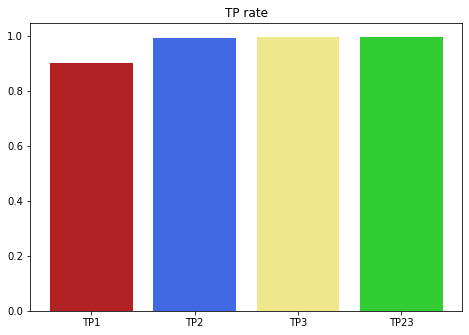

In [351]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
names = ['TP1', 'TP2', 'TP3', 'TP23']
values = [TP1,TP2,TP3,TP23]
ax.bar(names,values, color=clrs)
ax.set_title('TP rate')
plt.show()

In [353]:
FN1 = cmtest1[1][0]/(cmtest1[1][0]+cmtest1[1][1])
FN2 = cmtest2[1][0]/(cmtest2[1][0]+cmtest2[1][1])
FN3 = cmtest3[1][0]/(cmtest3[1][0]+cmtest3[1][1])
FN23 = cmtest23[1][0]/(cmtest23[1][0]+cmtest23[1][1])

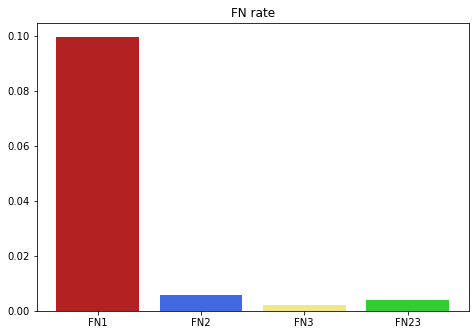

In [343]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
names = ['FN1', 'FN2', 'FN3', 'FN23']
values = [FN1,FN2,FN3,FN23]
ax.bar(names,values, color=clrs)
ax.set_title('FN rate')
plt.show()

In [345]:
TN1 = cmtest1[0][0]/(cmtest1[0][1]+cmtest1[0][0])
TN2 = cmtest2[0][0]/(cmtest2[0][1]+cmtest2[0][0])
TN3 = cmtest3[0][0]/(cmtest3[0][1]+cmtest3[0][0])
TN23 = cmtest23[0][0]/(cmtest23[0][1]+cmtest23[0][0])

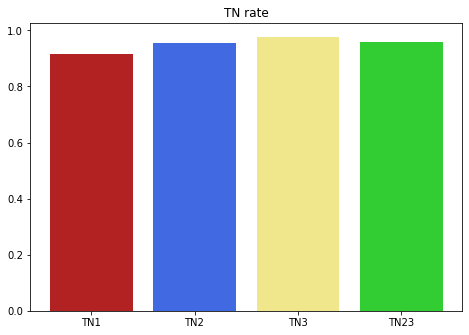

In [346]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
names = ['TN1', 'TN2', 'TN3', 'TN23']
values = [TN1,TN2,TN3,TN23]
ax.bar(names,values, color=clrs)
ax.set_title('TN rate')
plt.show()

In [347]:
FP1 = cmtest1[0][1]/(cmtest1[0][1]+cmtest1[0][0])
FP2 = cmtest2[0][1]/(cmtest2[0][1]+cmtest2[0][0])
FP3 = cmtest3[0][1]/(cmtest3[0][1]+cmtest3[0][0])
FP23 = cmtest23[0][1]/(cmtest23[0][1]+cmtest23[0][0])

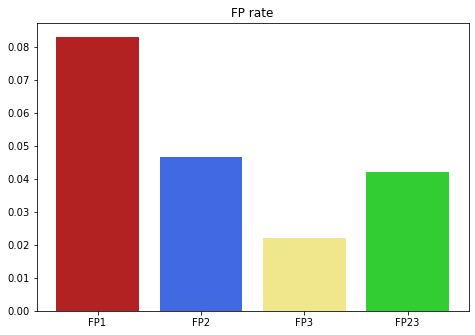

In [348]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
names = ['FP1', 'FP2', 'FP3', 'FP23']
values = [FP1,FP2,FP3,FP23]
ax.bar(names,values, color=clrs)
ax.set_title('FP rate')
plt.show()

Text(0.5, 1.0, 'CM Modelos 2 y 3 - SENSIBILIDAD')

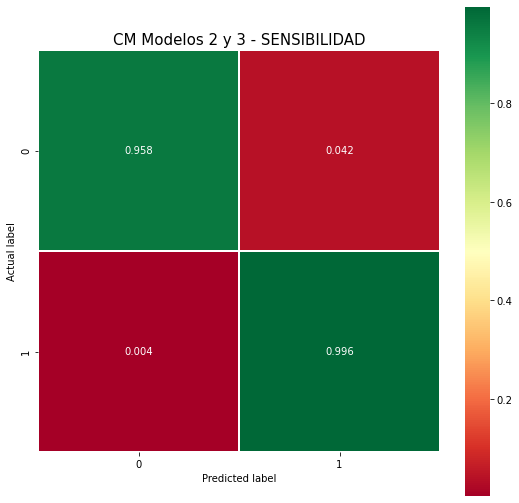

In [356]:
plt.figure(figsize=(9,9))
sns.heatmap([[TN23,FP23],[FN23,TP23]], annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'RdYlGn')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = ('CM Modelos 2 y 3 - SENSIBILIDAD')
plt.title(all_sample_title, size = 15)